<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Linear Discriminant Analysis(LDA)</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
sc = StandardScaler()

In [5]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [8]:
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [9]:
lr = LogisticRegression()
lr.fit(X_train_lda,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluating the model:

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
lr_pred = lr.predict(X_test_lda)
print(confusion_matrix(y_test,lr_pred))

[[18  0  0]
 [ 0 11  2]
 [ 0  1 13]]


In [11]:
print(classification_report(y_test,lr_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.92      0.85      0.88        13
          2       0.87      0.93      0.90        14

avg / total       0.93      0.93      0.93        45



## Plotting Decision Regions:

In [12]:
import Plotting_Decision_Boundaries as pdb

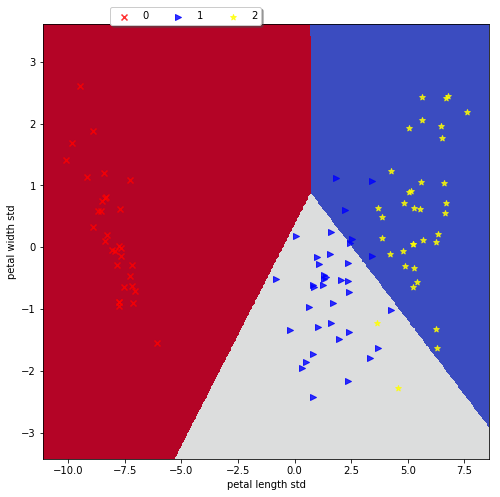

In [13]:
pdb.plot_regions(X=X_train_lda,y=y_train,classifier=lr)

### Evaluating the test set:

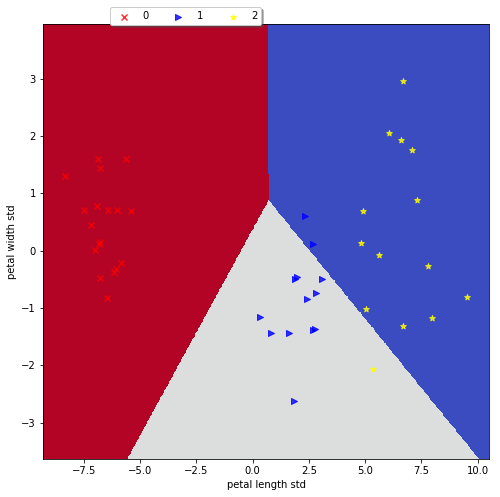

In [14]:
pdb.plot_regions(X=X_test_lda,y=y_test,classifier=lr)

## Reference: 
http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html